In [1054]:
"""
splitcode, version 0.30.0

config for splitcode 
@extract <13Grr_umi[10]>8{linker2},<13Grr_bc[8]>{linker2},{linker2}<13Grr_bc[8]>{linker1},{linker1}<13Grr_bc[8]>,{linker1}8<13Grr_read>0:-1
@extract <~13Gr_umi[10]>8{linker2rc},<~13Gr_bc[8]>{linker2rc},{linker2rc}<~13Gr_bc[8]>{linker1rc},{linker1rc}<~13Gr_bc[8]>,{linker1rc}8<~13Gr_read>0:-1
@extract <13Gf_bc[8]>{linker1},{linker1}<13Gf_bc[8]>{linker2},{linker2}<13Gf_bc[8]>,{linker2}8<13Gf_umi[10]>,0:0<13Gf_read>14{linker1}
@extract <~13Gfrc_bc[8]>{linker1rc},{linker1rc}<~13Gfrc_bc[8]>{linker2rc},{linker2rc}<~13Gfrc_bc[8]>,{linker2rc}8<~13Gfrc_umi[10]>,0:0<~13Gfrc_read>14{linker1rc}
groups	ids	tags	distances	locations
group1	linker1rc	CCACAGTCTCAAGCACGTGGAT	3:3:3	0:0:0
group1	linker1	ATCCACGTGCTTGAGACTGTGG	3:3:3	0:0:
group2	linker2rc	AGTCGTACGCCGATGCGAAACATCGGCCAC	3:3:3	0:0:0
group2	linker2	GTGGCCGATGTTTCGCATCGGCGTACGACT	3:3:3	0:0:0

splitcode/build/src/splitcode -c config.txt igvfb01_13G-gc_lig-ss_11.fastq.gz -o igvfb01_13G_scmodified/igvfb01_13G_lig-ss.fastq.gz

python3 run_rev.py 

ref='ref/mm39'
tech='2,0,24:1,0,10:0,0,0'
#kb ref --kallisto ${path_to_lr_kallisto} -i ${ref}_k-63.idx -k 63 -f1 ${ref}.cdna.fa -g ${ref}.t2g ${ref}.fa.gz ${ref}.gtf.gz 
sample='13G_'
output='b01_nanopore_'${sample}'_sc_single_cell'

kallisto bus -x ${tech} --long -i ${ref}_k-63.idx -o ${output} -t 32 ${sample}read.fastq.gz ${sample}umi.fastq.gz ${sample}bc.fastq.gz

${path_to_bustools} sort -t 32 ${output}/output.bus \
 -o ${output}/sorted.bus; \
 ${path_to_bustools} whitelist --threshold 200 -o ${output}/whitelist.txt \
 ${output}/sorted.bus; \
 ${path_to_bustools} correct -w ${output}/whitelist.txt \
 -o ${output}/corrected.bus ${output}/sorted.bus; \ 
 ${path_to_bustools} capture -b -c ${output}/whitelist.txt \
 -o ${output}/captured.bus ${output}/corrected.bus; \
 ${path_to_bustools} count ${output}/captured.bus \
 -t ${output}/transcripts.txt \
 -e ${output}/matrix.ec \
 -o ${output}/count -m \
 -g ${ref}.t2g; \
 ${path_to_lr_kallisto} quant-tcc -t 32 \
 ${output}/count.mtx \
 -i ${ref}_k-63.idx \
 -f ${output}/flens.txt \
 -e ${output}/count.ec.txt \
 -o ${output};

 ${path_to_bustools} count ${output}/corrected.bus \
 -t ${output}/transcripts.txt \
 -e ${output}/matrix.ec \
 -o ${output}/gcount --em --genecounts \
 -g ${ref}.t2g;
"""

"\nsplitcode, version 0.30.0\n\nconfig for splitcode \n@extract <13Gumi[10]>8{{group2}},<13Gbc[8]>{{group2}},{{group2}}<13Gbc[8]>{{group1}},{{group1}}<13Gbc[8]>,{{group1}}8<13Gread>0:-1\n@extract <13Gfbc[8]>{{group1}},{{group1}}<13Gfbc[8]>,{{group2}}<13Gfbc[8]>,{{group2}}8<13Gfumi[10]>,0:0<13Gfread>14{{group1}}\ngroups\tids\ttags\tdistances\tlocations\ngroup1\tlinker1\tCCACAGTCTCAAGCACGTGGAT\t3:3:3\t0:0:0\ngroup1\tlinker1rc\tATCCACGTGCTTGAGACTGTGG\t3:3:3\t0:0:0\ngroup1\tlinker1r\tTAGGTGCACGAACTCTGACACC\t3:3:3\t0:0:0\ngroup1\tlinker1rcr\tGGTGTCAGAGTTCGTGCACCTA\t3:3:3\t0:0:0\ngroup2\tlinker2\tAGTCGTACGCCGATGCGAAACATCGGCCAC\t3:3:3\t0:0:0\ngroup2\tlinker2rc\tGTGGCCGATGTTTCGCATCGGCGTACGACT\t3:3:3\t0:0:0\ngroup2\tlinker2r\tCACCGGCTACAAAGCGTAGCCGCATGCTGA\t3:3:3\t0:0:0\ngroup2\tlinker2rcr\tTCAGCATGCGGCTACGCTTTGTAGCCGGTG\t3:3:3\t0:0:0\n\nsplitcode/build/src/splitcode -c config.txt igvfb01_13G-gc_lig-ss_11.fastq.gz -o igvfb01_13G_scmodified/igvfb01_13G_lig-ss.fastq.gz\n\ncat 13Gumi.fastq.gz  13G

In [1055]:
# Import packages
import scipy
import anndata
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
from sklearn.decomposition import TruncatedSVD
from scipy import sparse, io
import seaborn as sns

matplotlib.rcParams.update({'font.size': 12})
%config InlineBackend.figure_format = 'retina'
# import data
dir = 'b01_nanopore_13G_sc_rt_single_cell' #'b01_nanopore_13G_single_cell'#'b01_nanopore_13G__sc_single_cell'
adata = sc.read_mtx(dir+"/gcount.mtx")
adata.obs.index = pd.read_csv(dir+"/gcount.barcodes.txt", header=None)[0].values
adata.var.index = pd.read_csv(dir+"/gcount.genes.txt", header=None)[0].values


In [1056]:
dir_Illumina = 'b01_next1_13G_single_cell'
Iadata = sc.read_mtx(dir_Illumina+"/gcount.mtx")
Iadata.obs.index = pd.read_csv(dir_Illumina+"/gcount.barcodes.txt", header=None)[0].values
Iadata.var.index = pd.read_csv(dir_Illumina+"/gcount.genes.txt", header=None)[0].values

In [1057]:
adata.var

""
ENSMUSG00000102693.2
ENSMUSG00000064842.3
ENSMUSG00000051951.6
ENSMUSG00000102851.2
ENSMUSG00000103377.2
...
ENSMUSG00000095366.3
ENSMUSG00000095134.3
ENSMUSG00000096768.9
ENSMUSG00000099871.2


In [1058]:
Iadata.var

""
ENSMUSG00000102693.2
ENSMUSG00000064842.3
ENSMUSG00000051951.6
ENSMUSG00000102851.2
ENSMUSG00000103377.2
...
ENSMUSG00000095366.3
ENSMUSG00000095134.3
ENSMUSG00000096768.9
ENSMUSG00000099871.2


In [1059]:
Iadata.obs

""
AAACATCGAACAACCAATTTGGCA
AAACATCGAACAACCATATGTGTC
AAACATCGAACTCACCCCATCTTG
AAACATCGAACTCACCTAGTTTCC
AAACATCGAACTCACCTCATTGCA
...
TTCACGCATCTTCACATTATTCTG
TTCACGCATGAAGAGAATCCTTAC
TTCACGCATGAAGAGATACTGTCT
TTCACGCATGGTGGTAACATTTAC


In [1060]:
adata.obs

""
AATCTTTCAAACATCGAACAACCA
AATCTTTCAAACATCGCGGATTGC
AATCTTTCAAACATCGGCTAACGA
AATCTTTCAACAACCAACCACTGT
AATCTTTCAACAACCAGCCAAGAC
...
TTCGCTACTGGTGGTAATCCTGTA
TTCGCTACTGGTGGTACAAGACTA
TTCGCTACTGGTGGTACGCATACA
TTCGCTACTTCACGCAGAATCTGA


In [1061]:
Iadata.obs.index

Index(['AAACATCGAACAACCAATTTGGCA', 'AAACATCGAACAACCATATGTGTC',
       'AAACATCGAACTCACCCCATCTTG', 'AAACATCGAACTCACCTAGTTTCC',
       'AAACATCGAACTCACCTCATTGCA', 'AAACATCGAACTCACCTCTCATGC',
       'AAACATCGAAGAGATCTAGTTTCC', 'AAACATCGAAGAGATCTCATTGCA',
       'AAACATCGAAGGTACACATGTCTC', 'AAACATCGAAGGTACAGCTATCTC',
       ...
       'TTCACGCATCCGTCTATAAATATC', 'TTCACGCATCCGTCTATTCATCGC',
       'TTCACGCATCTTCACACAATTCTC', 'TTCACGCATCTTCACAGCTATCAT',
       'TTCACGCATCTTCACAGTGCTTGA', 'TTCACGCATCTTCACATTATTCTG',
       'TTCACGCATGAAGAGAATCCTTAC', 'TTCACGCATGAAGAGATACTGTCT',
       'TTCACGCATGGTGGTAACATTTAC', 'TTCACGCATGGTGGTAGCTTCATA'],
      dtype='object', length=21390)

In [1062]:
adata.obs.index

Index(['AATCTTTCAAACATCGAACAACCA', 'AATCTTTCAAACATCGCGGATTGC',
       'AATCTTTCAAACATCGGCTAACGA', 'AATCTTTCAACAACCAACCACTGT',
       'AATCTTTCAACAACCAGCCAAGAC', 'AATCTTTCAACCGAGAAACGCTTA',
       'AATCTTTCAACCGAGACAAGACTA', 'AATCTTTCAACCGAGAGATAGACA',
       'AATCTTTCAACCGAGATGGAACAA', 'AATCTTTCAACGCTTAAGCCATGC',
       ...
       'TTCGCTACTGGAACAAACAGATTC', 'TTCGCTACTGGAACAACATCAAGT',
       'TTCGCTACTGGTGGTAACATTGGC', 'TTCGCTACTGGTGGTAACCACTGT',
       'TTCGCTACTGGTGGTAACTATGCA', 'TTCGCTACTGGTGGTAATCCTGTA',
       'TTCGCTACTGGTGGTACAAGACTA', 'TTCGCTACTGGTGGTACGCATACA',
       'TTCGCTACTTCACGCAGAATCTGA', 'TTCTGTCAGTCTGTCAGTCTGTCA'],
      dtype='object', length=21856)

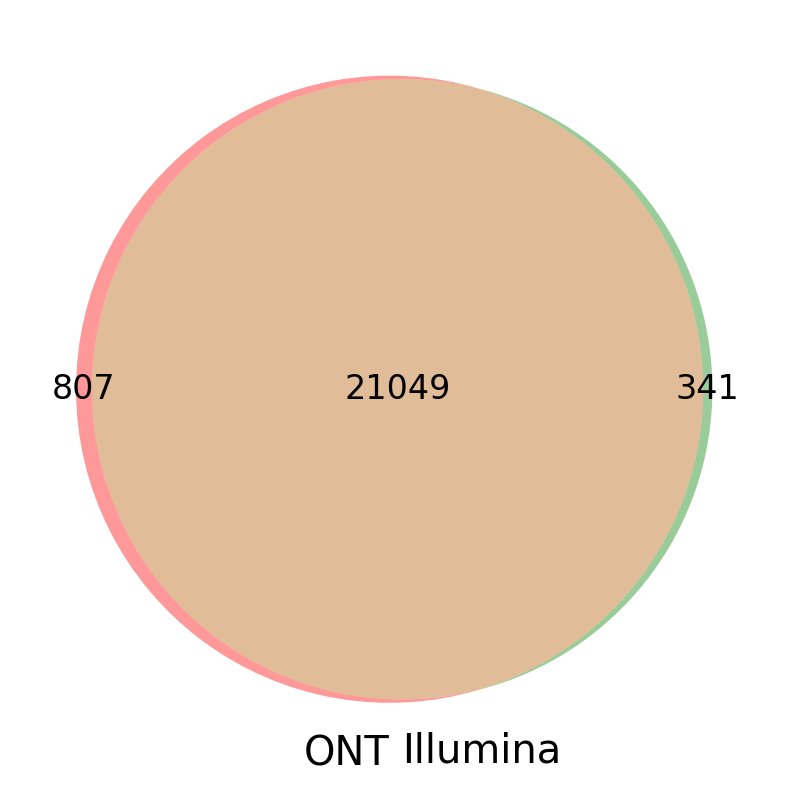

In [1063]:
#!pip install matplotlib-venn
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

aadata = [t for t in adata.obs.index]
iadata = [t[16:24]+t[8:16]+t[0:8] for t in Iadata.obs.index]

venn2((set(aadata), set(iadata)), ('ONT', 'Illumina'))

In [1064]:
#adata.obs_names_make_unique()
#sc.pp.filter_genes(adata, min_cells=100, inplace=True)
sc.pp.calculate_qc_metrics(adata, inplace=True)
#sc.pp.filter_cells(adata, min_genes=200, inplace=True)#min_genes=300) 
sc.pp.filter_cells(adata, min_counts=500, inplace=True)#min_genes=300) 
#adata = adata[:, adata.var["n_counts"]]
sc.pp.filter_genes(adata, min_cells=100, inplace=True)
#adata = adata[:, adata.var["n_cells"]]
#Iadata.obs_names_make_unique()
sc.pp.calculate_qc_metrics(Iadata, inplace=True)
#sc.pp.filter_cells(Iadata, min_genes=200, inplace=True)#min_genes=300) 
#sc.pp.filter_genes(Iadata, min_cells=100, inplace=True)
sc.pp.filter_cells(Iadata, min_counts=500, inplace=True)#min_genes=300) 
#Iadata = Iadata[:, Iadata.var["n_counts"]]
sc.pp.filter_genes(Iadata, min_cells=100, inplace=True)
#Iadata = Iadata[:, Iadata.var["n_cells"]]

In [1065]:
adata

AnnData object with n_obs × n_vars = 9019 × 8425
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

In [1066]:
Iadata

AnnData object with n_obs × n_vars = 19362 × 12387
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

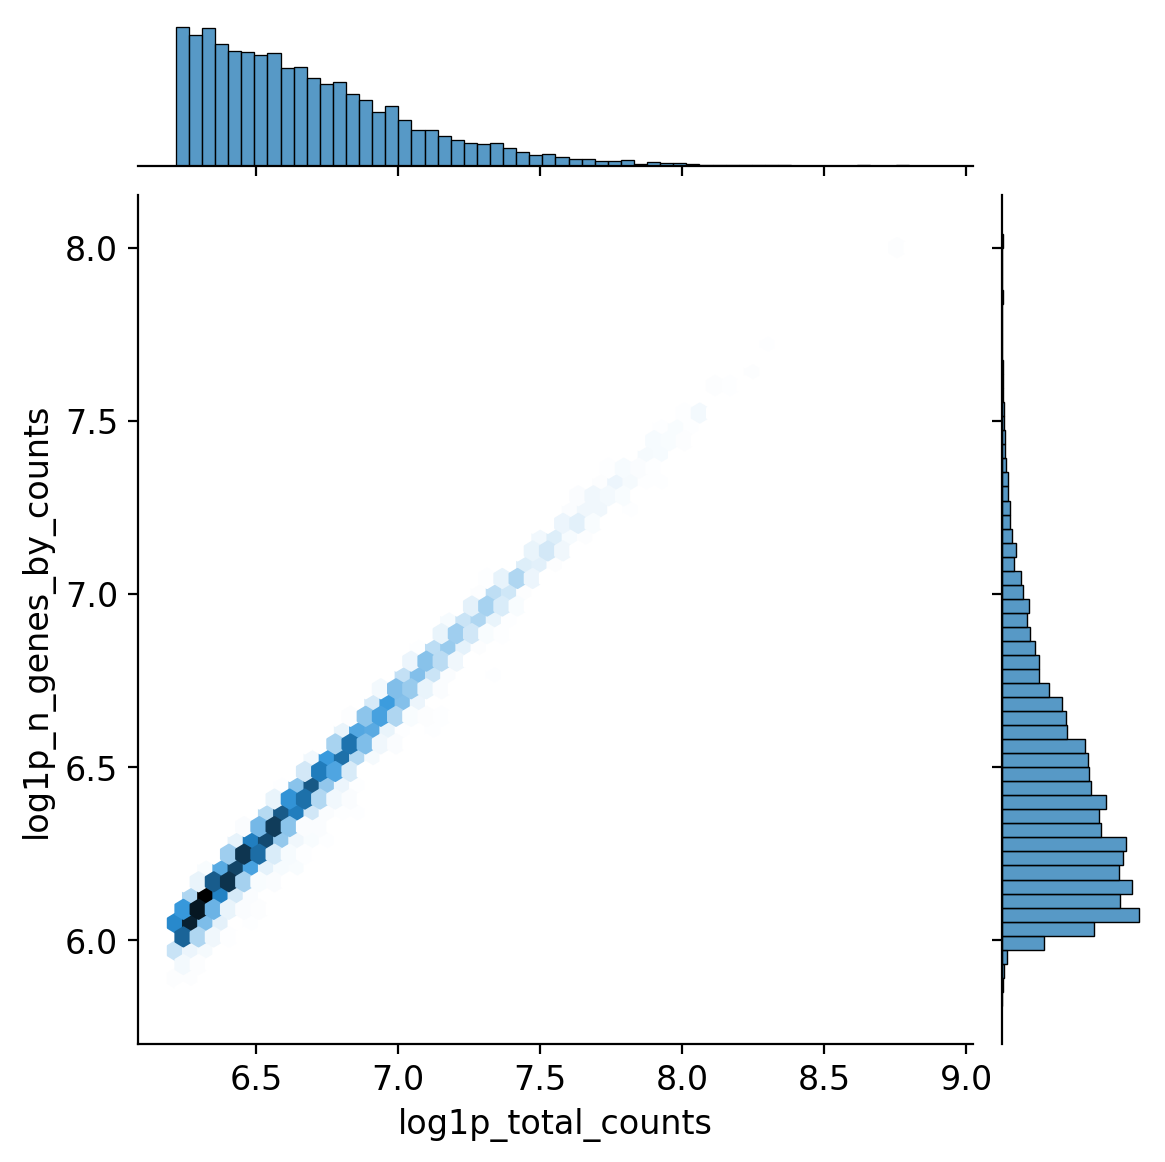

In [1067]:
sns.jointplot(
    data=adata.obs,
    x="log1p_total_counts",
    y="log1p_n_genes_by_counts",
    kind="hex",
)

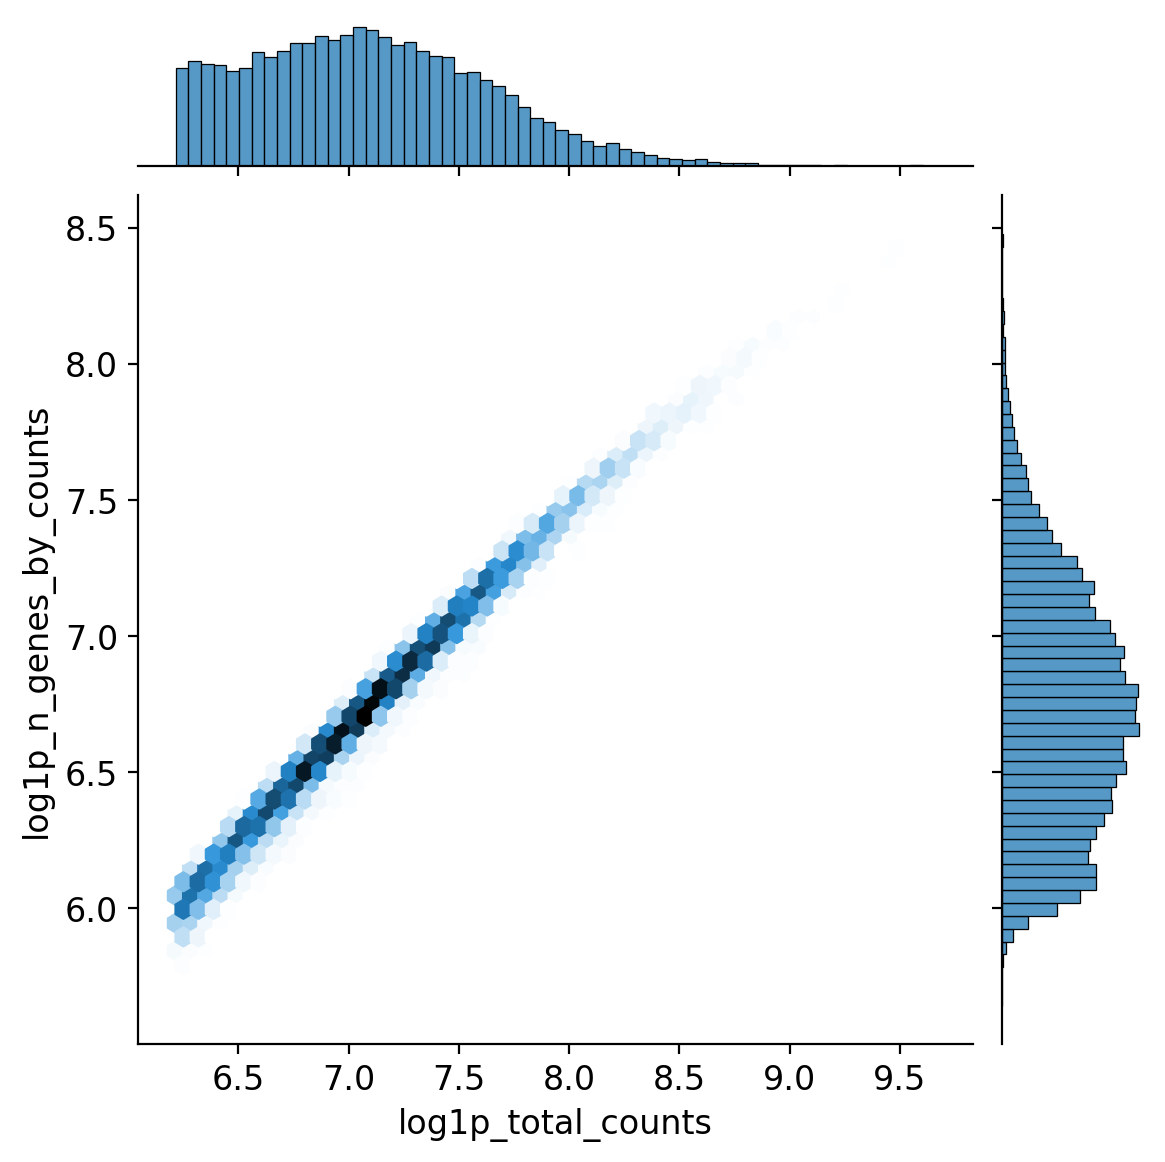

In [1068]:
sns.jointplot(
    data=Iadata.obs,
    x="log1p_total_counts",
    y="log1p_n_genes_by_counts",
    kind="hex",
)

In [1069]:
#adata.obs_names_make_unique()
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)

#Iadata.obs_names_make_unique()
sc.pp.normalize_per_cell(Iadata, counts_per_cell_after=1e4)
sc.pp.log1p(Iadata)

In [1070]:
intersect = [t[16:24]+t[8:16]+t[0:8] for t in adata.obs.index if t[16:24]+t[8:16]+t[0:8] in Iadata.obs.index.values]
intersecta = [t for t in adata.obs.index if t[16:24]+t[8:16]+t[0:8] in Iadata.obs.index.values]
intersectsc = [t for t in adata.obs.index if t in Iadata.obs.index]

#if 'TCATGCTC_AACGCTTA_AACGTGAT'
if 'AACGTGATAACGCTTATCATGCTC' in Iadata.obs.index.values:
    print("hello, moon")
if 'AACGTGATAACGCTTATCATGCTC' in adata.obs.index.values:
    print("hello, moon")

hello, moon


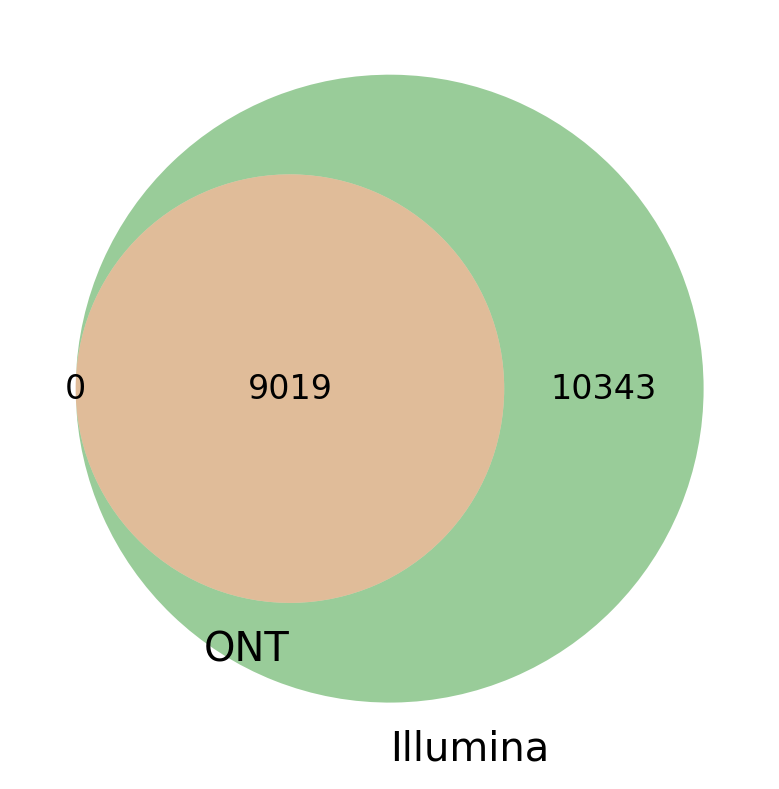

In [1071]:
#!pip install matplotlib-venn
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

iadata = [t[16:24]+t[8:16]+t[0:8] for t in Iadata.obs.index]

venn2((set(intersecta), set(iadata)), ('ONT', 'Illumina'))


In [1072]:
intersect_g = [gene for gene in adata.var.index if gene in Iadata.var.index]

In [1073]:
print(len(intersecta))
print(len(intersect))
print(len(intersectsc))
print(len(intersect_g))

9019
9019
0
8417


In [1074]:
Iadata.var.index

Index(['ENSMUSG00000051951.6', 'ENSMUSG00000104017.2', 'ENSMUSG00000103147.2',
       'ENSMUSG00000103161.2', 'ENSMUSG00000102331.2', 'ENSMUSG00000033845.14',
       'ENSMUSG00000025903.15', 'ENSMUSG00000033813.16',
       'ENSMUSG00000002459.18', 'ENSMUSG00000033793.13',
       ...
       'ENSMUSG00000031355.17', 'ENSMUSG00000031352.11',
       'ENSMUSG00000035299.17', 'ENSMUSG00000072844.7', 'ENSMUSG00000095562.9',
       'ENSMUSG00000056673.15', 'ENSMUSG00000069049.12',
       'ENSMUSG00000068457.15', 'ENSMUSG00000069045.12',
       'ENSMUSG00000096768.9'],
      dtype='object', length=12387)

In [1075]:
#Iadata.obs_names_make_unique(join='-')
    
adata[intersectsc, intersect_g]
pearson_gene_ONT_vs_Ill = []
for c in intersecta:
    if np.squeeze(np.asarray(adata[c, intersect_g].X.todense())).all() != 1:
        pearson=scipy.stats.pearsonr(np.squeeze(np.asarray(adata[c, intersect_g].X.todense())), np.squeeze(np.asarray(Iadata[c[16:24]+c[8:16]+c[0:8], intersect_g].X.todense())))
        pearson_gene_ONT_vs_Ill.append(pearson[0])

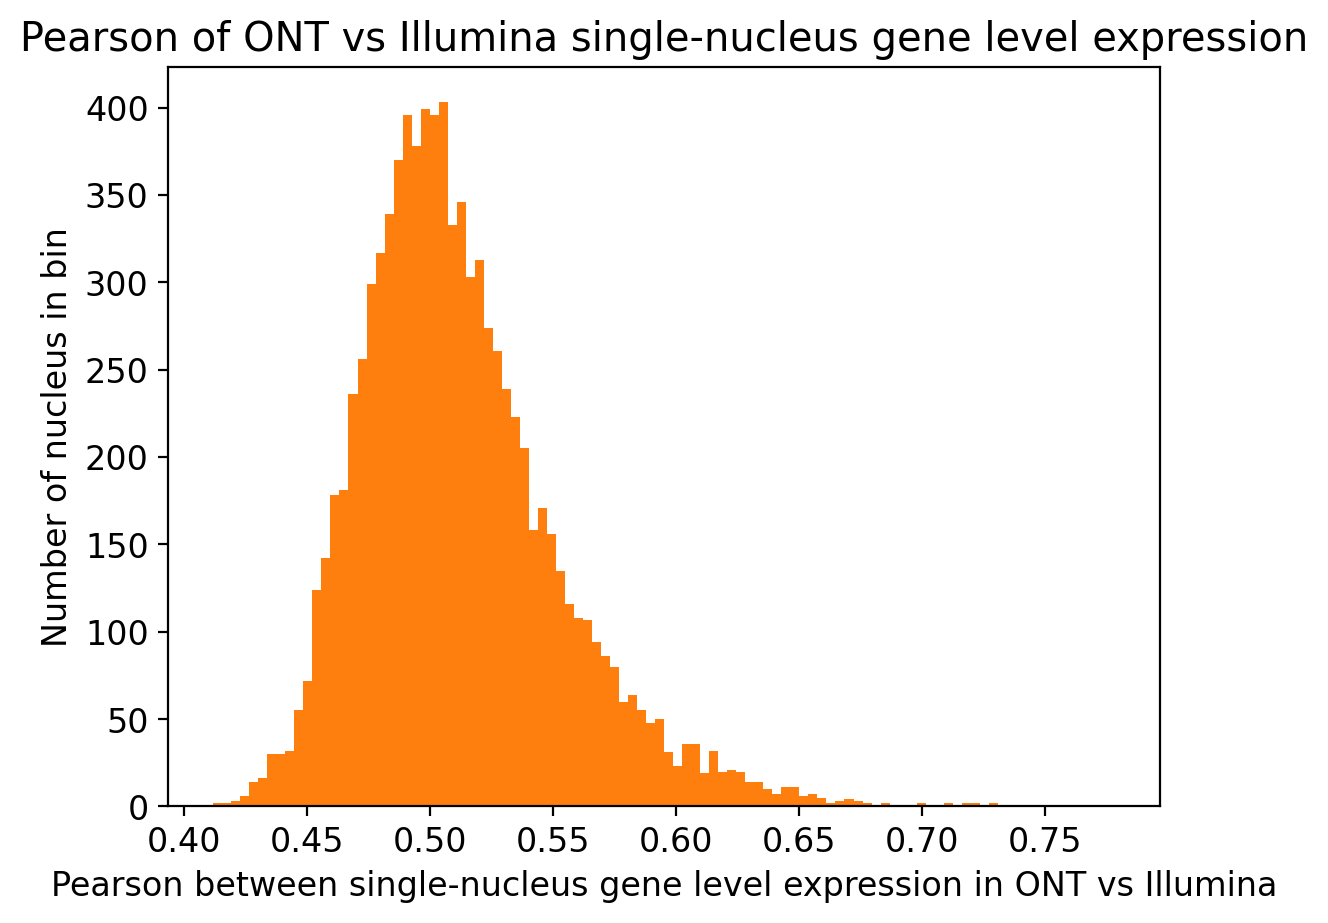

9019

In [1076]:
import matplotlib.pyplot as plt

plt.hist(pearson_gene_ONT_vs_Ill, bins=100, color='C1')
plt.xlabel("Pearson between single-nucleus gene level expression in ONT vs Illumina")
plt.ylabel("Number of nucleus in bin")
plt.title("Pearson of ONT vs Illumina single-nucleus gene level expression")
plt.show()
len(pearson_gene_ONT_vs_Ill)

In [1077]:
#Iadata.obs_names_make_unique(join='-')
    
adata[intersectsc, intersect_g]
spearman_gene_ONT_vs_Ill = []
for c in intersecta:
    if np.squeeze(np.asarray(adata[c, intersect_g].X.todense())).all() != 1:
        spearman=scipy.stats.spearmanr(np.squeeze(np.asarray(adata[c, intersect_g].X.todense())), np.squeeze(np.asarray(Iadata[c[16:24]+c[8:16]+c[0:8], intersect_g].X.todense())))
        spearman_gene_ONT_vs_Ill.append(spearman[0])

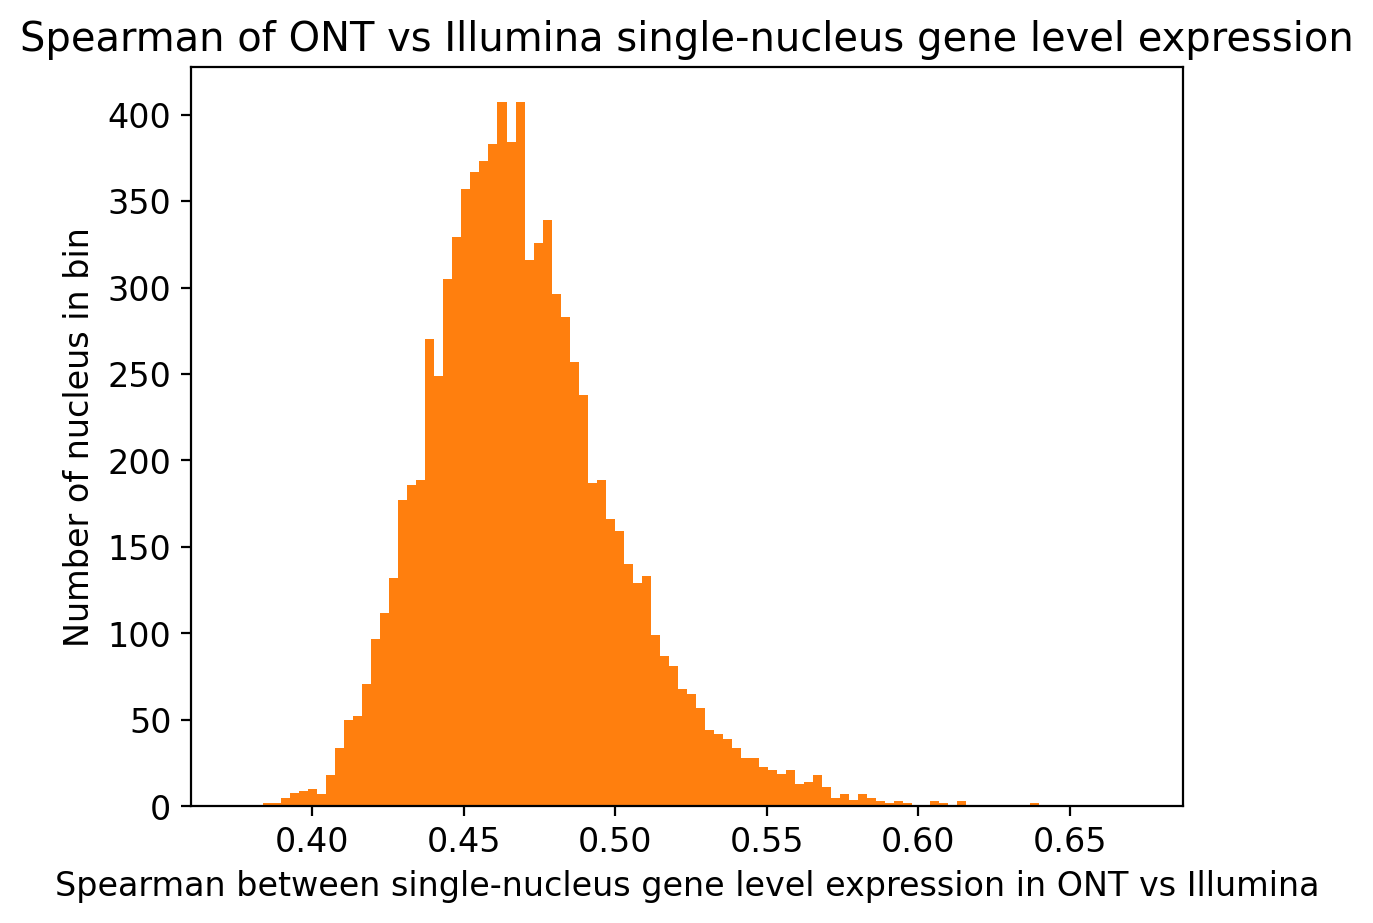

9019

In [1078]:
import matplotlib.pyplot as plt

plt.hist(spearman_gene_ONT_vs_Ill, bins=100, color='C1')
plt.xlabel("Spearman between single-nucleus gene level expression in ONT vs Illumina")
plt.ylabel("Number of nucleus in bin")
plt.title("Spearman of ONT vs Illumina single-nucleus gene level expression")
plt.show()
len(spearman_gene_ONT_vs_Ill)

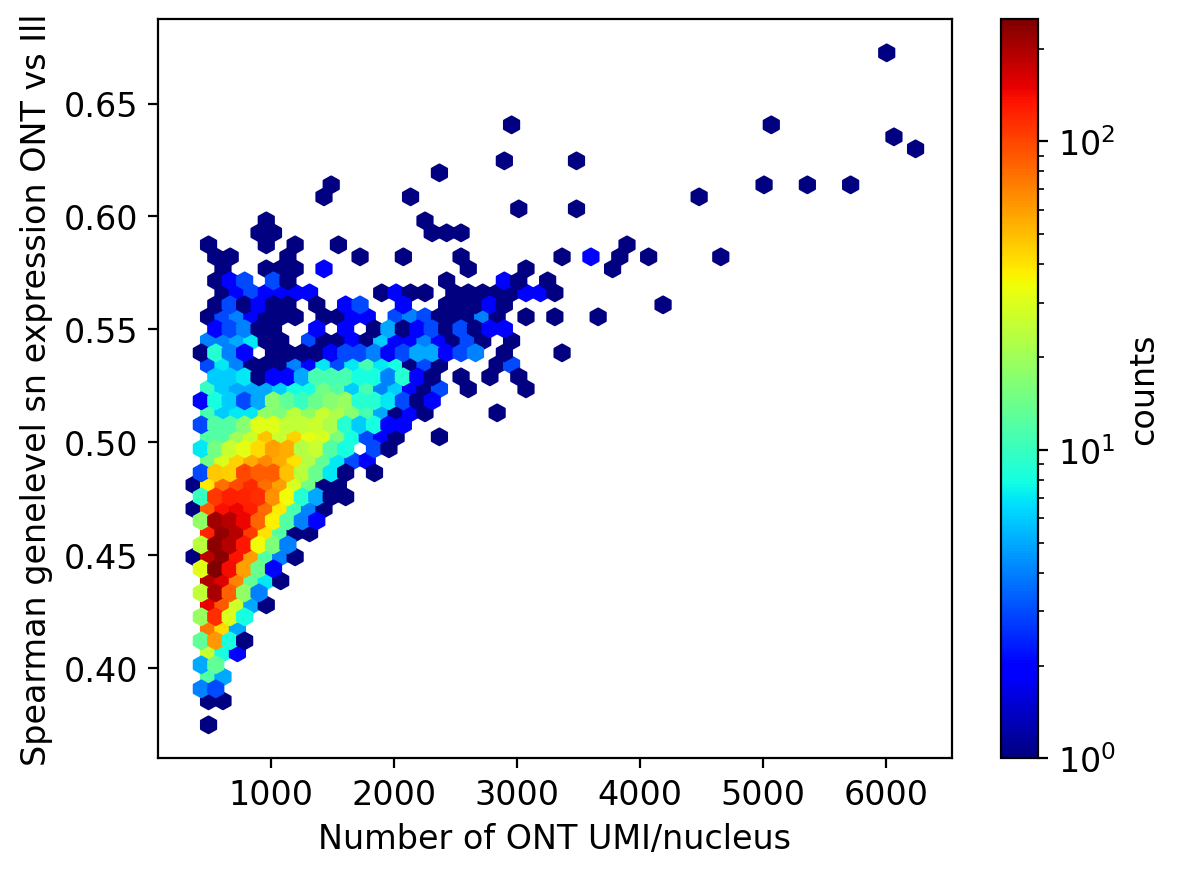

In [1099]:
#plt.scatter(adata.obs['n_counts'], spearman_gene_ONT_vs_Ill)
plt.hexbin(adata.obs['n_counts'], spearman_gene_ONT_vs_Ill, gridsize=50, cmap='jet', bins='log')
plt.ylabel("Spearman genelevel sn expression ONT vs Ill")
plt.xlabel("Number of ONT UMI/nucleus")
plt.colorbar(label='counts')
plt.show()

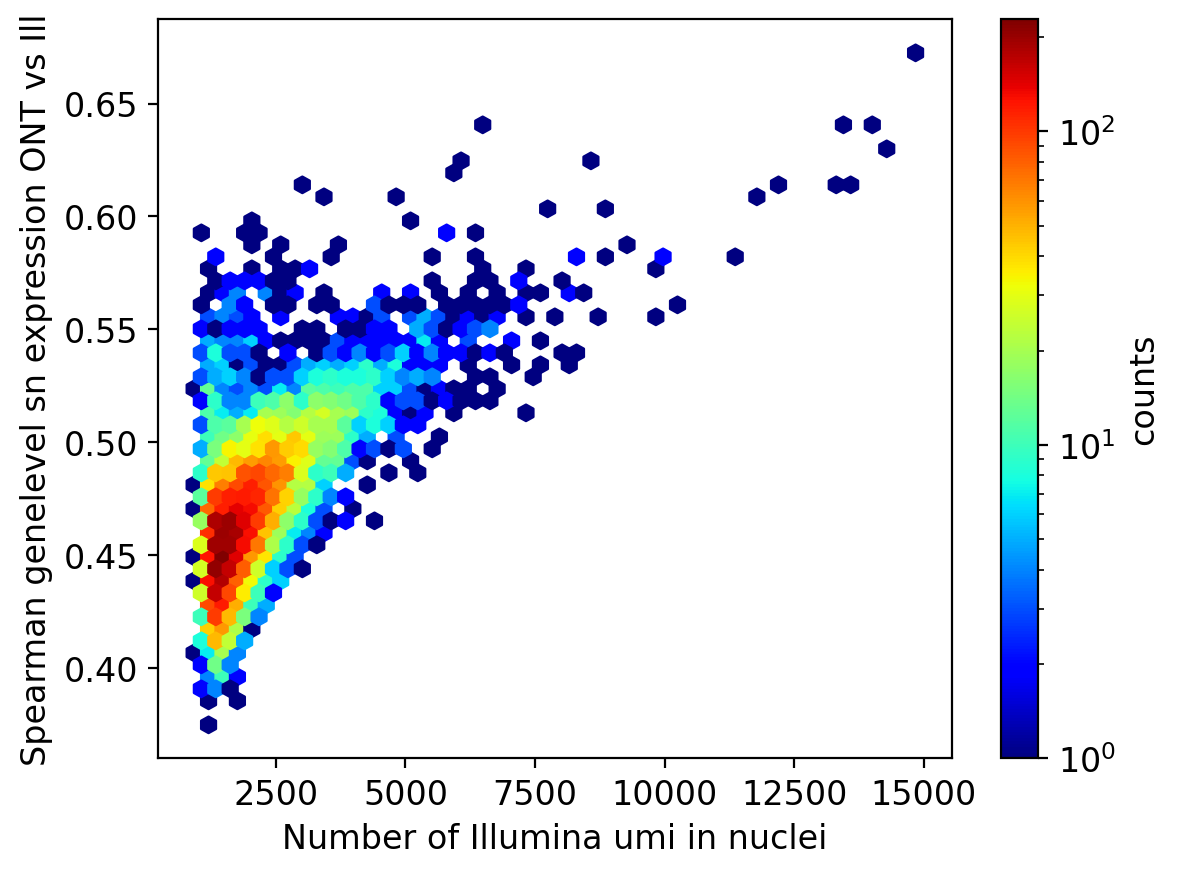

In [1096]:
#plt.scatter(adata.obs['n_counts'], spearman_gene_ONT_vs_Ill)
plt.hexbin(Iadata.obs['n_counts'][intersect], spearman_gene_ONT_vs_Ill, gridsize=50, cmap='jet', bins='log')
plt.ylabel("Spearman genelevel sn expression ONT vs Ill")
plt.xlabel("Number of Illumina umi in nuclei")
plt.colorbar(label='counts')
plt.show()